<a href="https://colab.research.google.com/github/dhairyachandra/CSEE5590-Python-Deep-Learning-Programming/blob/master/Lab2/Source/Ques4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[  0   0   0 ...   3   2  40]
 [  0   0   0 ...  49  13   1]
 [  0   0   0 ...   0   2 304]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
(156060, 45)
(104560, 45) (104560, 5)
(51500, 45) (51500, 5)
Epoch 1/15
 - 11s - loss: 1.2310 - accuracy: 0.5146
Epoch 2/15
 - 11s - loss: 1.2079 - accuracy: 0.5206
Epoch 3/15
 - 11s - loss: 1.1822 - accuracy: 0.5314
Epoch 4/15
 - 11s - loss: 1.1477 - accuracy: 0.5477
Epoch 5/15
 - 11s - loss: 1.1201 - accuracy: 0.5624
Epoch 6/15
 - 11s - loss: 1.1022 - accuracy: 0.5686
Epoch 7/15
 - 11s - loss: 1.0897 - accuracy: 0.5753
Epoch 8/15
 - 11s - loss: 1.0817 - accuracy: 0.5776
Epoch 9/15
 - 11s - loss: 1.0745 - accuracy: 0.5800
Epoch 10/15
 - 11s - loss: 1.0687 - accuracy: 0.5830
Epoch 11/15
 - 11s - loss: 1.0630 - accuracy: 0.5857
Epoch 12/15
 - 11s - loss: 1.0578 - accuracy: 0.5867
Epoch 13/15
 - 11s - loss: 1.0522 - accuracy: 0.5891
Epoch 14/15
 - 11s - loss: 1.0476 - accuracy: 0.5907
Epoch 15/15
 -

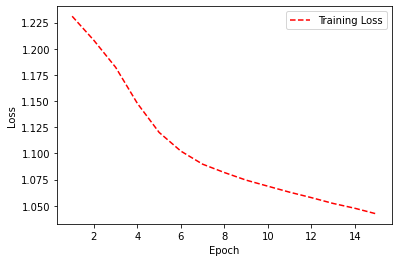

In [9]:
from keras.layers import Dropout
from keras.layers import Flatten
import matplotlib.pyplot as plt
from keras.constraints import maxnorm
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.optimizers import SGD
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
import pandas as pd

# Load Train and Test Dataset

trn_data = pd.read_csv('/content/drive/My Drive/UMKC/Colab Files/Task 4 - Data/train.csv')
tst_data = pd.read_csv('/content/drive/My Drive/UMKC/Colab Files/Task 4 - Data/test.csv')
train_data = trn_data[['phrase', 'sentiment']]


train_data['phrase'] = train_data['phrase'].apply(lambda x: x.lower())
train_data['phrase'] = train_data['phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
for idx, row in train_data.iterrows():
    row[0] = row[0].replace('rt', ' ')
max_fatures = 2000

# Tokenizing

toknzd_data = Tokenizer(num_words=max_fatures, split=' ')
toknzd_data.fit_on_texts(train_data['phrase'].values)

T = toknzd_data.texts_to_sequences(train_data['phrase'].values)
print(T)
T_fnl = pad_sequences(T)
print(T_fnl)
embed_dim = 128
lstm_out = 196
print(T_fnl.shape)

# CNN Model

def model_generate():
    seq_model = Sequential()
    seq_model.add(Embedding(max_fatures, embed_dim, input_length=T_fnl.shape[1]))
    seq_model.add(
        Conv1D(128, (5), activation='relu', kernel_constraint=maxnorm(3)))
    seq_model.add(Dropout(0.2))
    seq_model.add(Conv1D(128, (5), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    seq_model.add(MaxPooling1D(5))
    seq_model.add(Flatten())
    seq_model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    seq_model.add(Dropout(0.2))
    seq_model.add(Dense(5, activation='softmax'))
    return seq_model
label__encoder = LabelEncoder()
integer_encoded = label__encoder.fit_transform(train_data['sentiment'])
y = to_categorical(integer_encoded)
x_Train_data, x_Test_data, y_Train_data, y_Test_data = train_test_split(T_fnl, y, test_size=0.33, random_state=42)
print(x_Train_data.shape, y_Train_data.shape)
print(x_Test_data.shape, y_Test_data.shape)

epochs = 15
lrate = 0.01
decay = lrate / epochs
sequntl_model = model_generate()
s_g_d = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
sequntl_model.compile(loss='categorical_crossentropy', optimizer=s_g_d, metrics=['accuracy'])
btch_size = 32
history = sequntl_model.fit(x_Train_data, y_Train_data, epochs=15, batch_size=btch_size, verbose=2)
performance, accuracy = sequntl_model.evaluate(x_Test_data, y_Test_data, verbose=2, batch_size=btch_size)
print(performance)
print(accuracy)

# Ploting Loss graph
epoch__count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch__count, history.history['loss'], 'r--')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()